In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

Даны два уравнения $f(x)=0$ и $g(x)=0$.<br>
Найти с точностью $\epsilon=10^-10$ все корни уравнений, содержащиеся на отрезке $[a, b]$.<br>
Фунция $№1: f(x) = \cos^2{x} + \frac{2}{35}*\cos{x} - \frac{1}{35}$ <br>
Функция $№2: g(x) = \cos^2{x} - \frac{2}{7}*\cos{x} + \frac{1}{49}$

### Function 1:

In [2]:
def f(x):
    return (np.cos(x))**2 + 2/35*np.cos(x) - 1/35

### Function 2:

In [3]:
def g(x):
     return (np.cos(x))**2 - 2/7*np.cos(x) + 1/49

In [4]:
# отрисовка графика функции.
def illustrate_func(x_range, func):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.plot(x_range, func(x_range))
    plt.grid(True)

### Bisection method

In [9]:
def bisection(a_1, b_1, eps, h):
    # start data
    limit = 500
    count = 0
    x_1 = (a_1 + b_1)/2
    # check start data
    if abs(h(a_1)) < eps: 
        x = a_1
    elif abs(h(b_1)) < eps:
        x = b_1
    elif abs(h(x_1)) < eps:
        x = x_1
    # algorithm
    else:
        while (abs(h(x_1)) > eps and count < limit):
            if h(a_1)*h(x_1) < 0: # then x lies in [a_, x_]
                b_1 = x_1
                #print(b_1)
            if h(b_1)*h(x_1) < 0: # then x lies in [x_, b_]
                a_1 = x_1
                #print(a_1)
            x_1 = (a_1 + b_1) / 2
            count += 1
        x = x_1
        
    return x, count

### Root f

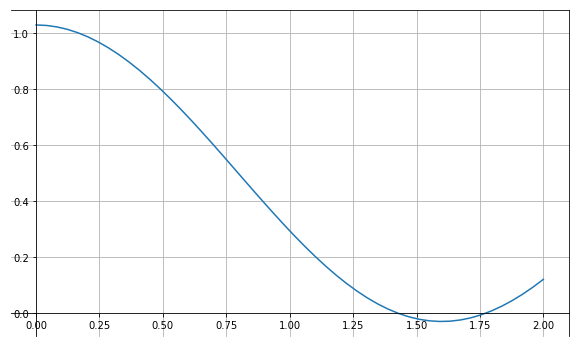

In [17]:
illustrate_func(np.linspace(0.0, 2.0), f)

Два корня. Отрезки локализации:<br> 
* $[a_1, b_1] = [1.0, 1.5]$ 
* $[a_2, b_2] = [1.5, 2.0]$

In [11]:
answer, num_iter = bisection(1.0, 1.5, 10**-10, f)
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: 1.42744875792, number of iterations: 28


In [12]:
answer, num_iter = bisection(1.5, 2.0, 10**-10, f)
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: 1.77215424739, number of iterations: 27


### Root g

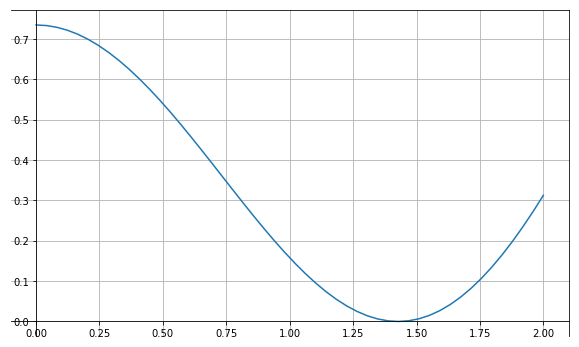

In [15]:
illustrate_func(np.linspace(0, 2), g)

* Найдем корень фукнции $g(x)$: $$\cos^2{x} - \frac{2}{7} \cos{x} + \frac{1}{7} = 0$$
$$(\cos{x} - \frac{1}{7})^2 = 0 $$
$$\cos{x} = \frac{1}{7}$$
$$x = \pm \arccos{\frac{1}{7}} + 2\pi n$$
* Рассмотрим производную:
$$f'(x) = -2 \cos{x} \sin{x} + \frac{2}{7} \sin{x} = 0$$
$$\sin{x}(-2 \cos{x} + \frac{2}{7}) = 0 $$
$$ \sin{x} = 0 \qquad \qquad \cos{x} = \frac{1}{7}$$
$$ \qquad \qquad \quad  x = \pi k \qquad \quad x = \pm \arccos{\frac{1}{7}} + 2 \pi n \qquad $$ 
* Таким образом видим, что точка $x = \pm \arccos{\frac{1}{7}} + 2 \pi n$ является точкой экстремума функции. По графику видно, что на рассматриваемом промежутке данная точка является точкой глобального экстремума - глобальный минимум. Значит функция не меняет знак в данной точке $=>$ **невозможно применить метод бисекций**, поскольку **метод основан на предположении, что функция меняется знак на промежутке**.

G function has no roots

## Task 2

Найти указанный в варианте  корень уравнения $f(x)=0$ с точностью $\epsilon = 10^-6$,  двумя  способами.
1.      Использовать метод бисекции. Предварительно определить отрезок локализации  $[a, b]$.
2.      Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять  середину отрезка локализации из п. 1.
      Сравнить число итераций в п. 2, 2.

In [18]:
def f_2(x):
    return np.exp(x + 1) * (x + 1) - x - 2

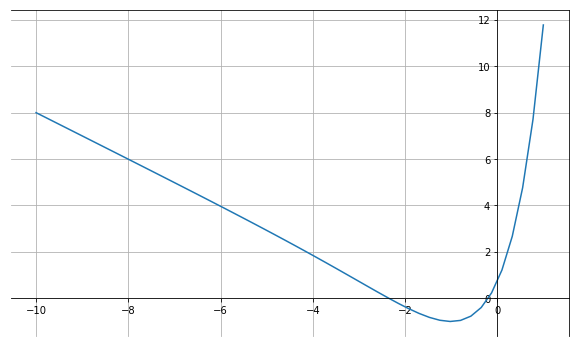

In [19]:
illustrate_func(np.linspace(-10, 1), f_2)

In [20]:
answer, num_iter = bisection(-3, -2, 10**-6, f_2)
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: -2.34997558594, number of iterations: 12


In [21]:
answer, num_iter = bisection(-0.5, 0.0, 10**-6, f_2)
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: -0.19353389740, number of iterations: 18


## Newton's Method

In [22]:
from scipy.misc import derivative

In [23]:
def newtons(x_, eps, f):
    limit = 1000
    count = 0
    x = x_ - f(x_)/ derivative(f, x_)
    while (abs(x - x_) > eps and count < limit):
        x_ = x
        x = x_ - f(x_)/ derivative(f, x_)
        count += 1
    return x, count

In [24]:
answer, num_iter = newtons((-3.0 + -2.0) / 2, 10**-6, f_2)
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: -2.34997650852, number of iterations: 5


In [25]:
answer, num_iter = newtons((-0.5 + 0.0) / 2, 10**-6, f_2)
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: -0.19353429800, number of iterations: 10


Т.о на нахождение первого корня:
* **метод бисекций** потратил 12 итераций.
* **метод Ньютона** потратил 5 итераций. 


На нахождение второго корня:
* **метод бисекций** потратил 18 итераций.
* **метод Ньютона** потратил 10 итераций.

## Task 3

Локализовать корни уравнения $f(x)=0$ и найти их с точностью $\varepsilon=10^{-5}$, используя метод простой итерации. К виду $x=\phi(x)$, удобному для итераций, уравнение f(x)=0 привести двумя способами.
1. Преобразовать уравнение к виду $x = x - \alpha f(x)$, где $\alpha = \frac{2}{(M + m)}$, $(0 < m < f'(x) < M)$, а x принадлежит отрезку локализации $[a, \:b]$.
2. Любым  другим  преобразованием  уравнения. Проверить достаточное условие сходимости метода.
<br>Использовать критерий окончания итерационного процесса вида $|x^{n} - x^{n - 1}| < \frac{(1 - q)}{q} \varepsilon$, где  в  п. 1 $q = {(M - m) \over (M + m)}$ и в п. 2 $q = \max\limits_{x \in [a, \:b]}{|\phi'(x)|}$

Функция: $f(x)=(x - 1)\sinh{(x+1)} - x$

In [43]:
def f_3(x):
    return (x-1)*np.sinh(x+1) - x

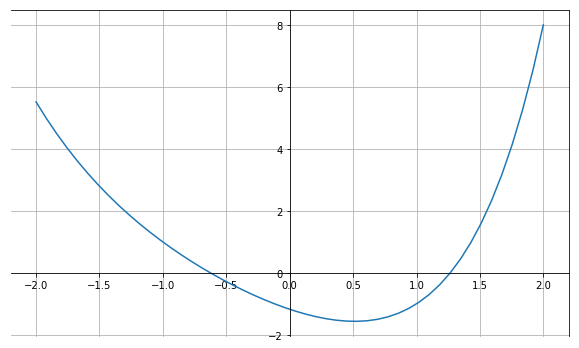

In [44]:
illustrate_func(np.linspace(-2, 2), f_3)

Отрезки локализации:
* $[a_1, b_1] = [-1, 0.5]$
* $[a_2, b_2] = [1, 1.5]$

In [45]:
a_1 = -1.0
b_1 = -0.5

a_2 = 1.0
b_2 = 1.5

eps = 10**(-5)

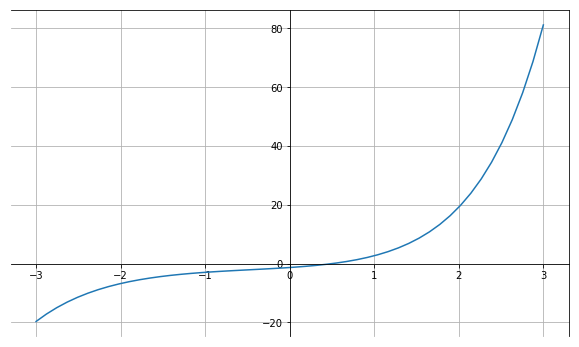

In [58]:
def f_4(x):
    return derivative(f_3, x, dx=0.1)
illustrate_func(np.linspace(-3, 3), f_4)

### Iteration method function

In [160]:
def iteration_method(a, b, phi, eps):
    x_ = a
    x = b
    count = 0
    while abs(x - x_) > eps:
        x = x_
        x_ = phi(x)
        count += 1
        #print('step_{}:{:.7f}'.format(count, x))
    #print('Function - {:.7f}'.format(f_3(x_)))
    return x_, count

### First Point

In [161]:
x = np.linspace(a_1, b_1)
m = (np.min(f_4(x)))
M = (np.max(f_4(x)))
alfa = 2 / (M + m)
q = (M - m)/ (M + m)
print('Values:', 'a={}'.format(a_1), 'b={}'.format(b_1),
     'm={}'.format(m), 'M={}'.format(M), 'alpha={}'.format(alfa), 'q={}'.format(q), sep='\n')

Values:
a=-1.0
b=-0.5
m=-3.0033350003968815
M=-2.1705564686151635
alpha=-0.38655623373211195
q=-0.16095786638924942


In [162]:
def phi_1(x):
    return x - alfa*f_3(x)

In [163]:
answer, num_iter = iteration_method(a_1, b_1, phi_1, abs((1 - q)/q*eps))
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: -0.62447217863, number of iterations: 5


### Second Point

In [164]:
x = np.linspace(a_2, b_2)
m = np.min(f_4(x))
M = np.max(f_4(x))
alfa = 2 / (M + m)
q = (M - m)/ (M + m)
print('Values:', 'a={}'.format(a_1), 'b={}'.format(b_1),
     'm={}'.format(m), 'M={}'.format(M), 'alpha={}'.format(alfa), 'q={}'.format(q), sep='\n')

Values:
a=-1.0
b=-0.5
m=2.645009826842826
M=8.151738257828853
alpha=0.1852409618447459
q=0.5100358355868301


In [166]:
answer, num_iter = iteration_method(b_2, b_1, phi_1, abs((1 - q)/q*eps))
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: 1.26552072936, number of iterations: 6


### Let's take another function. For example: $.$

### First point

In [270]:
def phi_2(x):
    return x + np.exp(x)*((x - 1)*np.sinh(x + 1) - x)

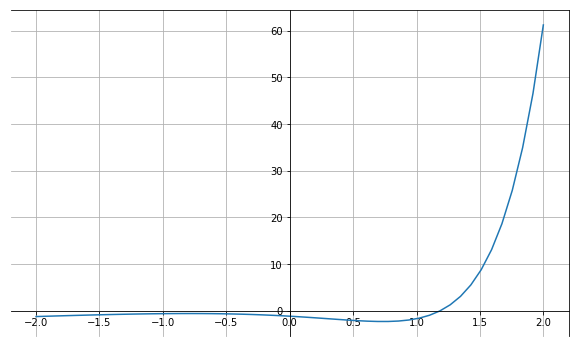

In [271]:
illustrate_func(np.linspace(-2, 2), phi_2)

In [285]:
x = np.linspace(a_1, b_1)
q = np.max(abs(derivative(phi_2, x, dx=0.1)))
print('Values:', 'a={}'.format(a_1), 'b={}'.format(b_1),
      'q={}'.format(q), sep='\n')

Values:
a=-1.0
b=-0.5
q=0.4897211780451882


$|\phi'(x)| > 1 => $ *не выполнено достаточное условие.* <br>
Тогда возьмем $\phi(x) = {\phi'(x) \over \max|\phi'(x)|}$

In [286]:
answer, num_iter = iteration_method(a_1, b_1, phi_2, abs((1 - q)/q*eps))
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: -0.62447227751, number of iterations: 8


In [278]:
def phi_3(x):
    return x - np.exp(-x)*((x - 1)*np.sinh(x + 1) - x)

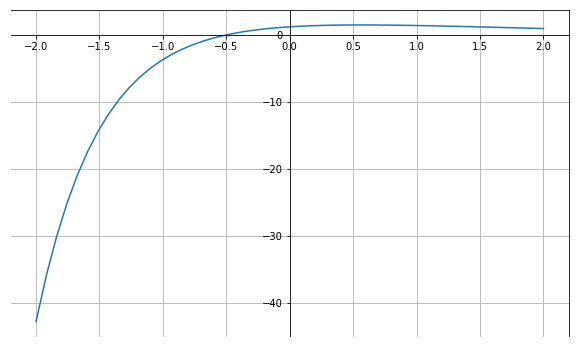

In [287]:
illustrate_func(np.linspace(-2, 2), phi_3)

In [283]:
x = np.linspace(a_2, b_2)
q = np.max(abs(derivative(phi_3, x, dx=0.1)))
print('Values:', 'a={}'.format(a_1), 'b={}'.format(b_1),
      'q={}'.format(q), sep='\n')

Values:
a=-1.0
b=-0.5
q=0.47002492448897315


In [284]:
answer, num_iter = iteration_method(b_2, a_2, phi_3, abs((1 - q)/q*eps))
print('Answer: {:.11f}, number of iterations: {:d}'.format(answer, num_iter))

Answer: 1.26552244566, number of iterations: 14
